# Linear Regression

**Data consists of:**

Input: $x$ (i.e. measurements, features, independent variables)

Output: $y$ (i.e. response, dependent variable)


**Objective:**

To find a function $f(x, \beta) \approx y$, where $\beta$ is the parameter to be estimated from data\ observations.

For Simple Linear regression: $y = \beta_0 + \beta_1x$


For Multiple Linear regression: $y  = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \cdots + \beta_{n}x_{n}$, where $n$ is the number of features.

For instance you may want to predict how much sales we will get given $x_1$ amount of investments, $x_2$ amount of advertisements, $x_3$ amount of sales people and so on.

### Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_simple_linear_regression(x, y_true, y_pred, title = 'Linear Regression', xlabel = 'x', ylabel = 'y'):
  # plt.figure(figsize=(5, 5))
  plt.scatter(x = x, y = y_true)
  plt.plot(x, y_pred, 'g')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  # plt.xlim(min(x.min(), y_pred.min(), y_true.min()) - 5, max(x.max(), y_pred.max(), y_true.max()) + 5)
  # plt.ylim(min(x.min(), y_pred.min(), y_true.min()) - 5, max(x.max(), y_pred.max(), y_true.max()) + 5)
  plt.grid(linewidth=0.4, alpha=0.7)

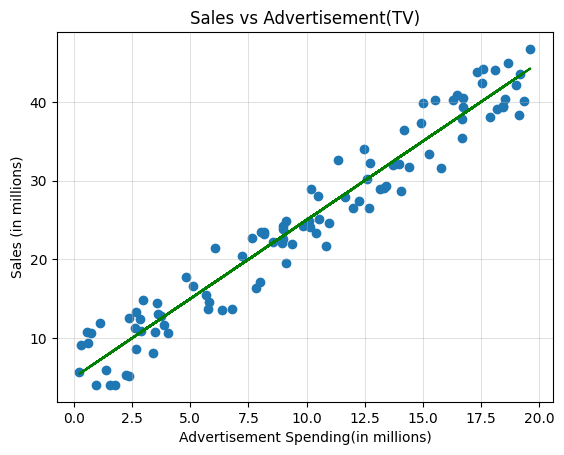

In [3]:
#lets take a hypothetical data
advertisement_tv_influence = 2
base_sales = 5
random_scale = 5
num_samples = 100


np.random.seed(40)

advertisement_tv = np.random.uniform(low=0, high=20, size=num_samples)
sales_true = base_sales + advertisement_tv * advertisement_tv_influence + np.random.uniform(low= -random_scale, high= random_scale, size=num_samples)
sales_pred = base_sales +  advertisement_tv * advertisement_tv_influence

plot_simple_linear_regression(x = advertisement_tv,y_true= sales_true, y_pred = sales_pred, title = 'Sales vs Advertisement(TV)',
                              xlabel = 'Advertisement Spending(in millions)', ylabel= 'Sales (in millions)')


### Parameter Estimation:
How to find $\beta$ given $x$ and $y$:
- **Least Squares method**

The green line is the simple linear regression line with output $\mathbf{y}$ as `sales` and $\mathbf{x}$ as `Advertiment spending in TV`.

- Terminology alert:

The residual or error, $\epsilon$ is the difference between the observed value, $y_i$, and predicted value, $\hat{y_i}$. The observed value is the actual output data point, which is all blue dots in the figure, and the predicted value is the point given by the green regression line for that $\mathbf{x}$ value. Error for each output data point is then the vertical distance from the actual output data point to the predicted point on a regression line.

The predicted output value is:

$$\hat{y_i} = \beta_0 + \beta_1x_i$$

The observed (actual) output value is:

$$y_i = \beta_0 + \beta_1x_i + \epsilon_i$$

Where $\epsilon_i$ is a random error and not a parameter. The error $\epsilon_i$ as ($y_{i}-\hat{y_{i}}$) can either be positive or negative or even 0 sometimes. To avoid the cancellation of the error while summing errors, we square each error and sum them, called _Residual Sum of Squares (RSS)_ or _Sum of Squared Errors (SSE)_.

$$\text{Sum of Squared Errors (SSE)} = \sum_{i=1}^{n}(y_{i}-\hat{y_{i}})^2$$

Sum of Squared Errors (SSE) is the function of $\beta_0$ and $\beta_1$. We can also take it as _Loss function_. The main principle of Least Squares is that we should end up choosing intercept ($\beta_0$) and slope ($\beta_1$) such that this overall sum of errors is minimum.


Thus, to estimate the parameters, we minimize:

$$\text{SSE} = \sum_{i=1}^{n}(y_{i}-\hat{y_{i}})^2 =\sum_{i=1}^{n}(y_{i}-(\beta_0+\beta_1x_i))^2 $$

Since we tend to minimize $\text{SSE}$, it is also called an objective function. Since the objective function, $\text{SSE}$ is a squared term, it is always positive. If we plot objective function, it would be a convex graph facing upwards.

Max SSE value:  3432.318917034541  at 10.0
Min SSE value:  803.2977535519387  at 4.848484848484849


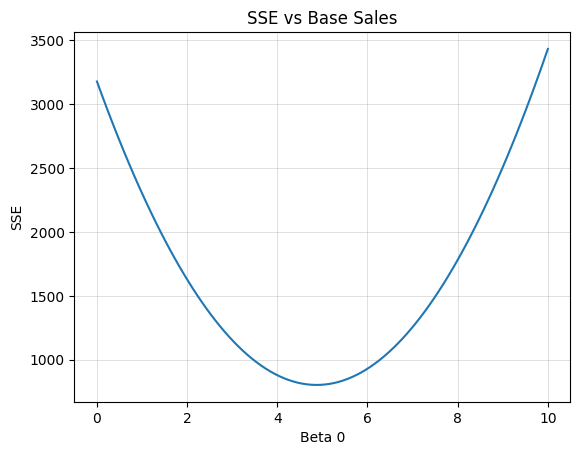

In [4]:
#for instance in our above example
#if we didn't know influence of tv advertisemnt
#we could try different values and see how much error each gives

base_sales_trials = np.linspace(base_sales - 5, base_sales + 5, 100)

sse_list = []

for base_sales_value in base_sales_trials:
  sales_pred2 = base_sales_value +  advertisement_tv * advertisement_tv_influence
  residual = sales_true - sales_pred2
  sse = np.sum(residual**2)
  sse_list.append(sse)

sse_list = np.array(sse_list)

print('Max SSE value: ', sse_list.max(), ' at', base_sales_trials[sse_list.argmax()])
print('Min SSE value: ', sse_list.min(), ' at', base_sales_trials[sse_list.argmin()])

plt.plot(base_sales_trials, sse_list)
plt.title('SSE vs Base Sales')
plt.xlabel('Beta 0')
plt.ylabel('SSE')
plt.grid(linewidth=0.4, alpha=0.7)

Max SSE value:  54269.21384068886  at 4.0
Min SSE value:  801.8958116042184  at 1.97979797979798


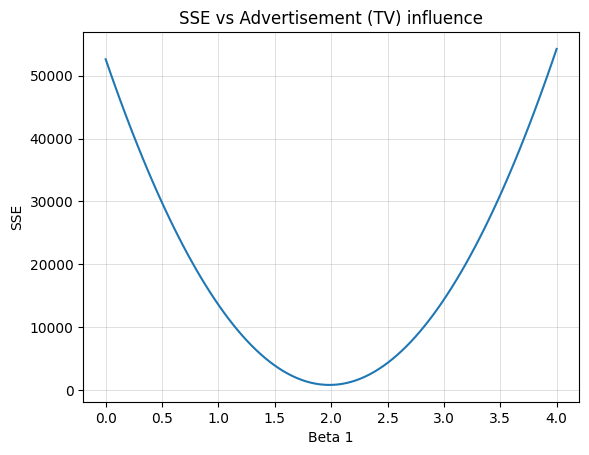

In [5]:
## we see a concave upward curve which tells us that there is one minimum point
# this shape remains true irrespective of value we set constant for a parameter while look at chagne of sse with the other parameter
# so we can simply equate the partial derivative to zero and get our desired parameters

advertisement_tv_influence_trials = np.linspace(advertisement_tv_influence - 2, advertisement_tv_influence + 2, 100)

sse_list = []

for influence_value in advertisement_tv_influence_trials:
  sales_pred2 = base_sales +  advertisement_tv * influence_value
  residual = sales_true - sales_pred2
  sse = np.sum(residual**2)
  sse_list.append(sse)

sse_list = np.array(sse_list)

print('Max SSE value: ', sse_list.max(), ' at', advertisement_tv_influence_trials[sse_list.argmax()])
print('Min SSE value: ', sse_list.min(), ' at', advertisement_tv_influence_trials[sse_list.argmin()])

plt.plot(advertisement_tv_influence_trials, sse_list)
plt.title('SSE vs Advertisement (TV) influence')
plt.xlabel('Beta 1')
plt.ylabel('SSE')
plt.grid(linewidth=0.4, alpha=0.7)

The parameters at a minimum point are obtained from calculus by setting the first derivative of the objective function to $0$. Gradient or slope is always $0$ at the minimum point. We have two unknown parameters, intercept ($\beta_0$) and slope ($\beta_1$) so, we will take the partial derivative of _SSE_ with respect to $\beta_0$ and $\beta_1$ separately. We will set both partial derivatives to 0 and solve for $\beta_0$ and $\beta_1$ separately.

Taking partial derivatives with respect to $\beta_0$:

$$\frac{\partial\ \text{SSE}}{\partial \beta_0}  = \frac{\partial }{\partial \beta_0}\sum(y_i-(\beta_0+\beta_1x_i))^2$$

Note that the derivative of the sum is the sum of the derivatives. So, we can take the derivative inside the summation.

$$\frac{\partial }{\partial \beta_0}\sum(y_i-(\beta_0+\beta_1x_i))^2 = \sum\frac{\partial }{\partial \beta_0}(y_i-(\beta_0+\beta_1x_i))^2 $$

Now, applying power rule and chain rule, we get:


$$= \sum2(y_i-(\beta_0+\beta_1x_i))(-1) $$

$$=-2\sum(y_i-(\beta_0+\beta_1x_i)) ......(1)$$



Now, with respect to $\beta_1$:


$$\frac{\partial\ {\text{SSE}} }{\partial \beta_1} = \frac{\partial }{\partial \beta_1}\sum(y_i-(\beta_0+\beta_1x_i))^2$$

Again, the derivative of the sum is the sum of the derivatives, So, we take the derivative inside the summation.

$$\frac{\partial }{\partial \beta_1}\sum(y_i-(\beta_0+\beta_1x_i))^2 = \sum\frac{\partial }{\partial \beta_1}(y_i-(\beta_0+\beta_1x_i))^2 $$


Applying power rule, $2$ comes out front and exponent becomes $1$. We will also apply chain rule to encounter the coefficient of $\beta_1$.
$$= \sum2(y_i-(\beta_0+\beta_1x_i))(-x_i) $$

Cleaning up a bit,

$$= -2\sum x_i(y_i-(\beta_0+\beta_1x_i)) ......(2)$$

Now, we set up the partial derivatives equal to $0$ for equation $(1)$ and $(2)$.

$$-2\sum(y_i-(\beta_0+\beta_1x_i))  = 0$$

$$-2\sum x_i(y_i-(\beta_0+\beta_1x_i))  = 0$$

Here, we have two equations and two unknowns. Solving this system of linear equation we get:

$$\hat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$\hat{\beta_0} = \bar{y} - \beta_1\bar{x}$$

In [6]:
#if predicting on our synthetic example data above
#the parameter estimites will be given as
x_mean = advertisement_tv.mean()
y_mean = sales_true.mean()
X = advertisement_tv
Y = sales_true

beta1 = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean)**2)
beta0 = y_mean - beta1 * x_mean

print("Predicted TV influence: ", beta1)
print("Predicted Base Sales: ", beta0)

Predicted TV influence:  1.9764320933742234
Predicted Base Sales:  5.1051298111935175


In [7]:
#validating our result with the one from a standard library

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)

print("Predicted TV influence: ", model.coef_[0])
print("Predicted Base Sales: ", model.intercept_)

Predicted TV influence:  1.9764320933742248
Predicted Base Sales:  5.105129811193503


In [8]:
residual1 = sales_true - (base_sales + advertisement_tv * 1.89)
residual2 = sales_true - (base_sales + advertisement_tv * 2.0)

print((residual1**2).sum(), (residual2**2).sum())

918.6892461391595 804.8643296614983


### **Multiple Linear regression**

The goal of multiple linear regression is to find a relationship between the output variable and two or more input variables. This relationship is represented mathematically as follows:

$$\hat{y } = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \cdots + \beta_{n}x_{n}$$
 $\beta_{1}$ through $\beta_{d}$ are the estimated regression coefficients for the independent variables $x_{1}$ through $x_{n}$. Then:
$$y  = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \cdots + \beta_{d}x_{d} +\epsilon$$

where $\epsilon$ is the random error, which reflects the difference between the actual output value and predicted output value.

We have $m$ set of observations. So we can write:
$$
\begin{matrix}
 y_1 = & \beta_0 + \beta_1x_{11}+\beta_2x_{12}+ \cdots + \beta_dx_{1n}+\epsilon_1\\
y_2 =  & \beta_0 + \beta_1x_{21}+\beta_2x_{22}+ \cdots + \beta_dx_{2n}+\epsilon_2\\
 y_3 = & \beta_0 + \beta_1x_{31}+\beta_2x_{32}+ \cdots + \beta_dx_{3n}+\epsilon_3\\
 \vdots&\vdots \\
y_n = & \beta_0 + \beta_1x_{m1}+\beta_2x_{m2}+ \cdots + \beta_dx_{mn}+\epsilon_n
\end{matrix}
$$

$x_{mn}$ is the $m$th observation for $n$th feature or input variable. These $m$ set of equations can be written in matrix form as:

$$\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix} =   \begin{bmatrix}
  1 & x_{11} & \cdots & x_{1n} \\
  1 & x_{21} & \cdots & x_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  1 & x_{m1} & \cdots & x_{mn}
 \end{bmatrix}\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_d
\end{bmatrix}+ \begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{bmatrix}$$

Using mathematical notations, we can write as:

$$\mathbf{y}= \mathbf{X}\boldsymbol{\beta} + \mathbf{\epsilon} ...(1)$$

From OLS, our objective is to find a column matrix or a column vector, $\boldsymbol{\beta}$, such that _Sum of Squared Errors_, $\text{SSE}$ is minimum. $\text{SSE}$ is written as:

$$\text{SSE} = \sum_{i=1}^{m} (y_i-\hat{y_i})^2 = \sum_{i=1}^{m}\epsilon_i^2 $$

Since

$$\epsilon^T\epsilon  = \begin{bmatrix}
\epsilon_1  & \epsilon_2  &\dots  & = \epsilon_m
\end{bmatrix}.\begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_m
\end{bmatrix} = \epsilon_1^2+\epsilon_2^2+\dots\epsilon_m^2 = \sum_{i=1}^{m}\epsilon_i^2$$

We can also write $\text{SSE}$ as:
$$\text{SSE} =\sum_{i=1}^{n}\epsilon_i^2 =  \epsilon^T\epsilon$$



From equation $\text{(1)}$, we know that

$$\mathbf{\epsilon} = \mathbf{y}- \mathbf{X}\boldsymbol{\beta}$$
so we can also write $\text{SSE}$ as:

$$\text{SSE} = \epsilon^T\epsilon = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$$

This positive quadratic error function or $\text{SSE}$ or objective function is always a convex surface facing upwards as in a simple linear equation. From calculus, the value of parameters at the minimum point is obtained by setting the first derivative of the objective function, with respect to the parameters, equal to $0$. So, we will take the partial derivative of the objective function, with respect to $\boldsymbol{\beta}$, and get the value for the column matrix, $\boldsymbol{\beta}$.

$$\frac{\partial\ \text{SSE} }{\partial \boldsymbol{\beta}}  = \frac{\partial }{\partial \boldsymbol{\beta}}(\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})=\frac{\partial }{\partial \boldsymbol{\beta}}(\mathbf{y^Ty}+\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta}-2\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y}) $$

You can take a pen and paper and try expanding the product term to the sums. You have to use basic transpose rules and matrix multiplication rules. That's it! Now, we will set the derivative to $0$ as:
$$\frac{\partial }{\partial \boldsymbol{\boldsymbol{\beta}}}(\mathbf{y^Ty}+\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta}-2\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y})=0$$

As we saw for the column vector $\mathbf{\epsilon}$ we know, $\boldsymbol{\beta}^T\boldsymbol{\beta} = \boldsymbol{\beta}^2$. After derivation we can write as:
$$ 2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta}- 2\mathbf{X}^T\mathbf{y} = 0$$

This can be written as:

$$ 2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = 2\mathbf{X}^T\mathbf{y} $$

$$
\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = \mathbf{X}^T\mathbf{y}$$

$$\boldsymbol{\beta} =(\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T\mathbf{y}$$

Thus, this normal equation derived is the solution to the unknown parameters in multiple linear regression.

In [9]:
#multi variable regression

advertisement2_tv_influence = 2
advertisement2_radio_influence = 0.5
advertisement2_others_influence = 5
base_sales = 5
random_scale = 10
num_samples = 100

advertisement2_tv = np.random.uniform(low=0, high=20, size=num_samples)
advertisement2_radio = np.random.uniform(low=0, high=15, size=num_samples)
advertisement2_others =  np.random.uniform(low=0, high=40, size=num_samples)


sales2_true = base_sales + advertisement2_tv * advertisement2_tv_influence \
                        + advertisement2_radio * advertisement2_radio_influence \
                        + advertisement2_others * advertisement2_others_influence \
                        + np.random.uniform(low= -random_scale, high= random_scale, size=num_samples)

# sales2_pred = base_sales +  advertisement2_tv * advertisement2_tv_influence \
#                         + advertisement2_radio * advertisement2_radio_influence \
#                         + advertisement2_others * advertisement2_others_influence

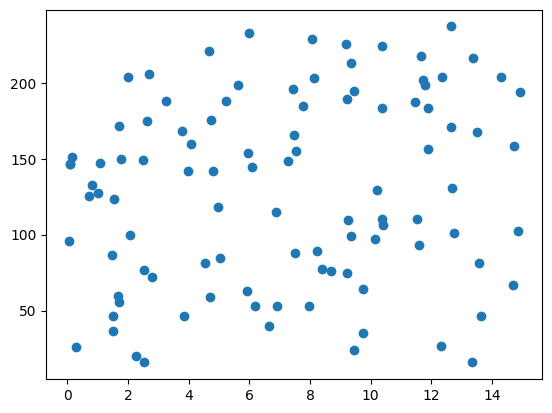

In [10]:
plt.scatter(advertisement2_radio, sales2_true)

#our data was clearly linear but why dont we see it here?

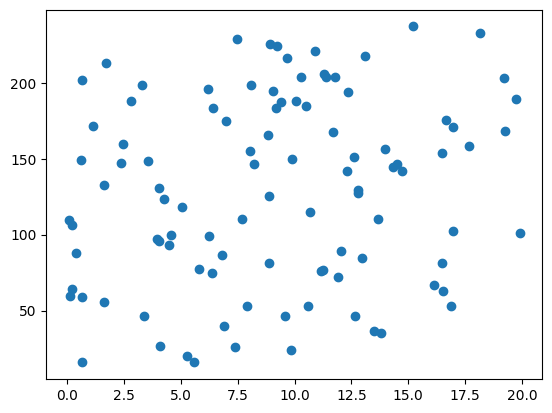

In [11]:
plt.scatter(advertisement2_tv, sales2_true)

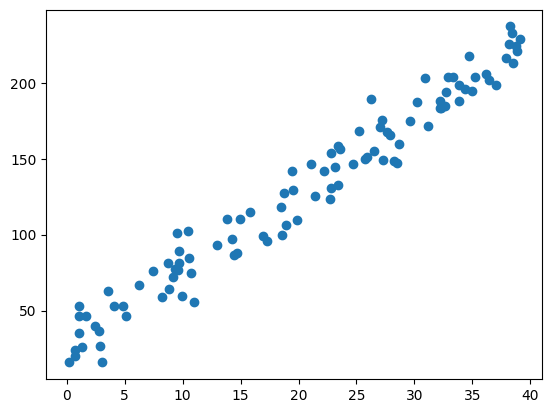

In [12]:
plt.scatter(advertisement2_others, sales2_true)

In [13]:
def get_regression_coeffs(x, y):
    X = np.hstack((np.ones((x.shape[0], 1)), x))
    X_transpose = X.T
    betas = np.linalg.inv(X_transpose @ X) @ (X_transpose @ y)
    return betas

In [14]:
print(advertisement2_tv)

[ 0.19282152  4.47713274  7.8965943   1.62247297  0.61242623 16.13355784
  6.96357804  0.05750017 17.67374069  6.88292587  8.21640018 19.72667176
  6.17649889 16.46969873 11.31367627 11.38711103  4.2464766   8.0677295
 13.78539345 12.34987355 18.17236325  0.64591557  4.0524951   8.90448084
 19.89727744  0.18837562  0.64601602 12.97395506 16.98805947 13.50315295
  9.17460394  3.55509564  9.38846796  5.26627717 16.52889475 14.34944183
 14.50931369  9.21391704 14.73648441 15.21851549  3.37970496  7.69815243
 11.77144293 13.11780253 10.87530012  9.0275503  10.58307195  2.45392237
  6.34640061 16.48332803  4.03887255 10.05634825  7.37635394 16.98446635
  1.60277168  0.3932522  16.641103   11.70571451 16.86720306 13.95875447
 12.6660263  11.89860055  3.26797352  8.82975361  4.55623666 12.79157591
 19.23987186 10.52165393  5.77950011 19.23001904 12.30011122 12.78772157
 12.02926641  9.56536137 11.17083065  5.56099351  0.1099397   8.03455955
  6.38964075  7.45216517  9.68382618  0.65657335 10.

In [15]:
print(advertisement2_tv.reshape(-1,1))

[[ 0.19282152]
 [ 4.47713274]
 [ 7.8965943 ]
 [ 1.62247297]
 [ 0.61242623]
 [16.13355784]
 [ 6.96357804]
 [ 0.05750017]
 [17.67374069]
 [ 6.88292587]
 [ 8.21640018]
 [19.72667176]
 [ 6.17649889]
 [16.46969873]
 [11.31367627]
 [11.38711103]
 [ 4.2464766 ]
 [ 8.0677295 ]
 [13.78539345]
 [12.34987355]
 [18.17236325]
 [ 0.64591557]
 [ 4.0524951 ]
 [ 8.90448084]
 [19.89727744]
 [ 0.18837562]
 [ 0.64601602]
 [12.97395506]
 [16.98805947]
 [13.50315295]
 [ 9.17460394]
 [ 3.55509564]
 [ 9.38846796]
 [ 5.26627717]
 [16.52889475]
 [14.34944183]
 [14.50931369]
 [ 9.21391704]
 [14.73648441]
 [15.21851549]
 [ 3.37970496]
 [ 7.69815243]
 [11.77144293]
 [13.11780253]
 [10.87530012]
 [ 9.0275503 ]
 [10.58307195]
 [ 2.45392237]
 [ 6.34640061]
 [16.48332803]
 [ 4.03887255]
 [10.05634825]
 [ 7.37635394]
 [16.98446635]
 [ 1.60277168]
 [ 0.3932522 ]
 [16.641103  ]
 [11.70571451]
 [16.86720306]
 [13.95875447]
 [12.6660263 ]
 [11.89860055]
 [ 3.26797352]
 [ 8.82975361]
 [ 4.55623666]
 [12.79157591]
 [19.23987

In [16]:
## solve using above formulation

x = np.hstack((advertisement2_tv.reshape(-1,1), advertisement2_radio.reshape(-1, 1),
                 advertisement2_others.reshape(-1,1)) )
print(x)
print('Shape: ',x.shape)

[[ 0.19282152  9.74555817  8.85704489]
 [ 4.47713274 11.58111974 12.96673033]
 [ 7.8965943   6.17851078  4.84823438]
 [ 1.62247297  0.83179821 23.37305099]
 [ 0.61242623  2.4939219  27.316527  ]
 [16.13355784 14.68725489  6.23910346]
 [ 6.96357804  2.63158248 29.61209784]
 [ 0.05750017  9.25963026 19.88739929]
 [17.67374069 14.71719729 23.42251387]
 [ 6.88292587  6.64125508  2.44131998]
 [ 8.21640018  0.09777102 24.68714601]
 [19.72667176  9.21494021 26.26680654]
 [ 6.17649889  7.42637059 34.3554001 ]
 [16.46969873  5.95479789 22.77260657]
 [11.31367627  2.68956658 36.18070104]
 [11.38711103 12.3529897  33.34010003]
 [ 4.2464766   1.52545453 22.70180026]
 [ 8.0677295   5.62855211 33.87686711]
 [13.78539345  9.74393268  1.04246968]
 [12.34987355 14.90626738 32.70344099]
 [18.17236325  5.99598271 38.45227987]
 [ 0.64591557  4.69641393  8.26198722]
 [ 4.0524951  12.67493497 22.80143405]
 [ 8.90448084  9.19296765 38.17907125]
 [19.89727744 12.75303976  9.49799621]
 [ 0.18837562 10.41921416

In [17]:
y = sales2_true.reshape(-1, 1)

print(sales2_true)
print(y)
print('Shape: ', y.shape)

[ 64.16882135  93.51393008  53.34248395 132.84363337 149.39704033
  66.97517333 174.73135847 109.77554356 158.14407459  39.71325757
 146.35280623 189.4675644  195.9699279  153.67735039 205.73260304
 203.58077895 123.32798153 198.74877014  35.33572892 194.01057749
 232.63067361  58.76967827 130.61924364 225.83669941 100.97785838
 106.3436324   16.44801931  84.96371249 170.58527787  36.71244957
 183.089137   148.64616739 187.54346277  19.84143305  63.22120952
 144.27884203 146.70687886 223.92262893 141.88677738 237.07673345
  46.19302889 110.32736856 203.91619639 217.33498262 221.25250746
 194.54531857  52.99101326 159.62810746  74.60645091  81.39552609
  95.61019165 188.03230448  26.34790537 102.58516697  55.76903975
  87.83007352 175.38436157 167.42615076  53.25017181 156.5995212
  46.68232826  72.07889935 198.79608258 165.4010873   99.79035794
 129.54123153 167.98363684 184.52849064  77.45167648 203.34413914
 142.16144973 127.34431177  89.54127997  46.15731002  76.40724378
  15.851955

In [18]:
betas = get_regression_coeffs(x, y)
print(betas)

[[6.87415765]
 [1.78924046]
 [0.63059476]
 [4.98480524]]


In [19]:
model2 = LinearRegression()
model2.fit(x, y)

print("Predicted TV influence: ", model2.coef_[0])
print("Predicted Base Sales: ", model2.intercept_)

Predicted TV influence:  [1.78924046 0.63059476 4.98480524]
Predicted Base Sales:  [6.87415765]


### Evaluating Regression Models

- MAE
- MSE / RMSE
- correlation coefficient ($r$)
- coefficient of determination ($r^2$)

In [20]:
sales2_pred = betas[0] +  betas[1] * advertisement2_tv \
                        + betas[2] * advertisement2_radio \
                        + betas[3] * advertisement2_others

In [21]:
#Mean Absolute error
residuals2 = sales2_true - sales2_pred
abs_error = np.sum(np.abs(residuals2) / len(residuals2))
print('Mean Absolute error:', abs_error)

Mean Absolute error: 5.176942201552675


In [22]:
#RMSE error
mse_error = np.sum(residuals2 ** 2) / len(residuals2)
rmse_error = np.sqrt(mse_error)
print('Mean squared error:', mse_error)
print('Root mean squared error:', rmse_error)

#However these error only give relative measure and not absolute 'goodness'
#For instance if we get MSE = 1000 what should be the ideal value then? MSE=10? or MSE=10000?
#We don't know. The best we can do is compare two model with their MSE values

Mean squared error: 34.922996205821384
Root mean squared error: 5.90956819114742


In [23]:
# correlation coefficient
corr_coeff_tv = np.corrcoef(x = advertisement2_tv, y = sales2_true) #this is known as correlation matrix
print('Correlation between advertisement spending in TV and sales: ', corr_coeff_tv)  #this shows all possible correlation between x & y but also between x & x and y & y

corr_coeff_radio = np.corrcoef(x = advertisement2_radio, y = sales2_true)
print('Correlation between advertisement spending in radio and sales: ', corr_coeff_radio[0,1])  #this is the required value

corr_coeff_others = np.corrcoef(x = advertisement2_others, y = sales2_true)
print('Correlation between advertisement spending in other categories and sales: ', corr_coeff_others[1,0])

# you can also calculate correlation coefficient in pandas dataframe with ease
import pandas as pd

print('Correlation coefficient matrix with pandas: ')

df = pd.DataFrame({'advertisement2_tv': advertisement2_tv,
                   'column2': advertisement2_radio,
                   'I can give any name to columnns 3': advertisement2_others,
                   'But give appropriate name; e.g. sales': sales2_true})

corr_matrix = df.corr() #find on your own of whose variables each element of this matrix represents the correlation between
print(corr_matrix)

Correlation between advertisement spending in TV and sales:  [[1.         0.18253221]
 [0.18253221 1.        ]]
Correlation between advertisement spending in radio and sales:  0.16059428750922922
Correlation between advertisement spending in other categories and sales:  0.9807670829142047
Correlation coefficient matrix with pandas: 
                                       advertisement2_tv   column2  \
advertisement2_tv                               1.000000  0.176386   
column2                                         0.176386  1.000000   
I can give any name to columnns 3               0.019121  0.090523   
But give appropriate name; e.g. sales           0.182532  0.160594   

                                       I can give any name to columnns 3  \
advertisement2_tv                                               0.019121   
column2                                                         0.090523   
I can give any name to columnns 3                               1.000000   
But give a

In [24]:
df.corr() #note that what is returned by this id a DataFrame
#we can use this matrix to quickly select more important variables (i.e. having higher absolute r value)

,advertisement2_tv,column2,I can give any name to columnns 3,But give appropriate name; e.g. sales
advertisement2_tv,1.000000,0.176386,0.019121,0.182532
column2,0.176386,1.000000,0.090523,0.160594
I can give any name to columnns 3,0.019121,0.090523,1.000000,0.980767
But give appropriate name; e.g. sales,0.182532,0.160594,0.980767,1.000000


In [25]:
##-- values of r and its interpretation
# +1.0 to +0.8	-1.0 to -0.8	Perfect or very strong association
# +0.8 to +0.6	-0.8 to -0.6	Strong association
# +0.6 to +0.4	-0.6 to -0.4	Moderate association
# +0.4 to +0.2	-0.4 to -0.2	Weak association
# +0.2 to 0.0	-0.2 to 0.0	Very weak or no association

##often time we use correlation to select the variables to include in linear regression
#for instannce from above we would probably choose only 'advertisement2_others' if we were fitting a regression line to the given data

In [26]:
## coefficient of determination
from sklearn.metrics import mean_squared_error, r2_score

y_true = y
y_pred = model2.predict(x)

print('MSE: ', mean_squared_error(y_true, y_pred) )
print('R squared: ', r2_score(y_true, y_pred) )


MSE:  34.92299620582141
R squared:  0.9906787264314009


In [27]:
#The higher the r2 value the better. R2 is interpreted as "The model explains r2 percent of the variance in data"

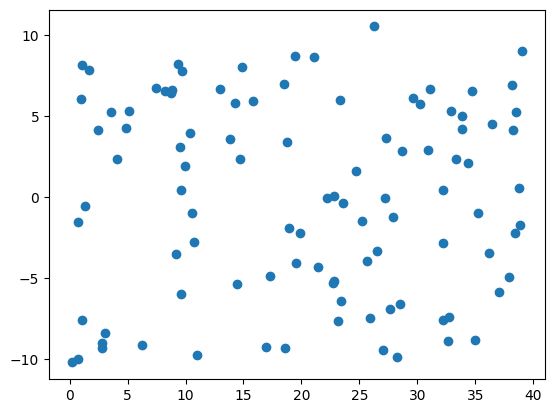

In [28]:
#residual plot should be uniformly distributed about residual = 0 line for the regression line to be a good fit for the given data
plt.scatter(advertisement2_others, residuals2)

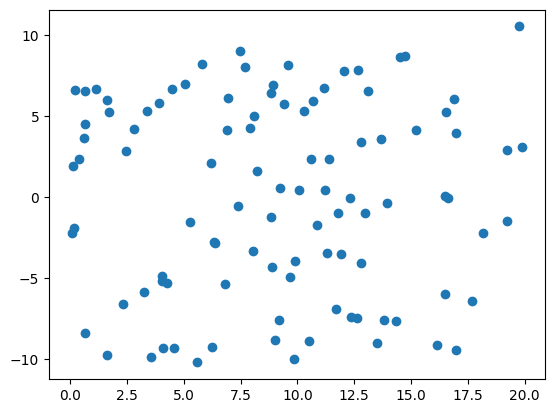

In [29]:
#residual plot
plt.scatter(advertisement2_tv, residuals2)

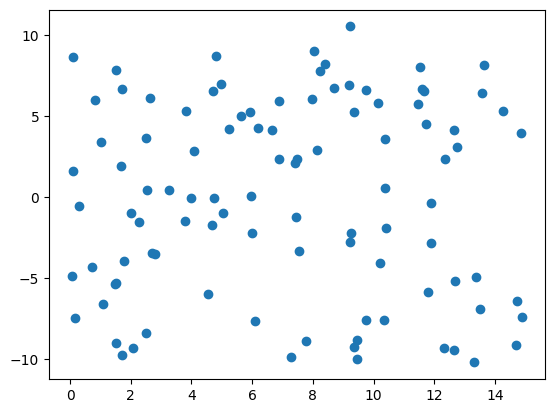

In [30]:
#residual plot
plt.scatter(advertisement2_radio, residuals2)

### What we actually do in practice

In [31]:
#train test split

#In practise we only have a sample of data from the population
#from which we want to infer the behaviour of entire population
#In practise we don't fit the regression line (or for that matter any model) on the whole dataset
#Instead we split the dataset into two parts train and test
#TRAIN portion is what we use for making (fitting) model
#TEST portion is used for model evaluation
#Test set must be independent from Train set so as to evaluate how our model generalizes to unseen cases
#A 80-20 split is such that train set contains 80% of data from original set and test set contains the rest 20%

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.2, random_state=2)

In [33]:
print(X_train)
print(y_train)

[[14.34944183  6.08419105 23.18042331]
 [19.72667176  9.21494021 26.26680654]
 [12.60504071  0.14568017 25.95164958]
 [10.87530012  4.68087534 38.84752734]
 [ 9.56536137 13.63505952  1.07795546]
 [16.13355784 14.68725489  6.23910346]
 [ 0.18837562 10.41921416 18.94466344]
 [ 8.03455955  7.54665203 26.51714998]
 [11.17083065  8.70498291  7.48212249]
 [ 3.26797352 11.80185042 37.01155444]
 [12.79157591 10.21825363 19.53807372]
 [ 4.47713274 11.58111974 12.96673033]
 [13.78539345  9.74393268  1.04246968]
 [ 6.34640061  9.2177742  10.69172714]
 [14.50931369  0.10139839 21.09169355]
 [ 6.38964075 11.87924659 32.21938223]
 [ 6.96357804  2.63158248 29.61209784]
 [ 2.34237918  1.08468721 28.48665011]
 [ 4.09056009 12.31219764  2.82702904]
 [ 8.21640018  0.09777102 24.68714601]
 [ 6.17649889  7.42637059 34.3554001 ]
 [16.98446635 14.8644583  10.42746515]
 [ 1.70365588  9.34796077 38.5299351 ]
 [ 1.60277168  1.71442096 10.96428225]
 [11.23066245  2.53704927  9.6112331 ]
 [ 9.38846796 11.47237809

In [34]:
print(X_test)
print(y_test)

[[13.66783497 10.36790435 13.79889846]
 [ 9.17460394 10.35840707 32.25867442]
 [16.641103    4.75118517 27.23454372]
 [19.89727744 12.75303976  9.49799621]
 [ 4.2464766   1.52545453 22.70180026]
 [ 8.90448084  9.19296765 38.17907125]
 [ 7.8965943   6.17851078  4.84823438]
 [12.97395506  5.02987316 10.56161598]
 [16.98805947 12.63879293 27.03126999]
 [16.46969873  5.95479789 22.77260657]
 [ 3.92452735 10.15334788 14.28804098]
 [ 9.84482176  9.45124831  0.68901172]
 [ 0.1099397   1.67169086  9.98209879]
 [11.31367627  2.68956658 36.18070104]
 [ 0.19282152  9.74555817  8.85704489]
 [ 0.64591557  4.69641393  8.26198722]
 [ 1.62247297  0.83179821 23.37305099]
 [13.50315295  1.51176179  2.75504401]
 [11.89860055  2.80975167  9.15364578]
 [ 7.45216517  8.05354914 39.07309686]]
[[110.25730052]
 [183.089137  ]
 [175.38436157]
 [100.97785838]
 [123.32798153]
 [225.83669941]
 [ 53.34248395]
 [ 84.96371249]
 [170.58527787]
 [153.67735039]
 [ 97.32721359]
 [ 23.91875477]
 [ 59.85071272]
 [205.73260

In [35]:
model3 = LinearRegression()
model3.fit(X_train, y_train)  ##fit in train set
y_pred = model3.predict(X_test)  ##evaluate in test set

print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  40.72733108715234
R2:  0.9894057333367617


## **Some Assumptions under Linear Regression**



- __Linear regression should be linear in parameters__

  The linearity condition is on parameters. The output variable should be linear in terms of parameters, not necessarily in terms of input variables.

  For example:
  
  The equation below is linear in terms of both inputs and parameters, so holds the assumption.

  $$y = \beta_0 + \beta_1x$$  

  Similarly, equation below is not linear in terms of inputs but linear in terms of parmaeters so it holds the assumption.

  $$y = \beta_0 +\beta_1x^2$$

  Lastly, the equation below is linear in terms of input but is not linear in terms of parameters, so it violates the assumption and is not a linear regression model.

  $$y = \beta_0 +\beta_1^2x$$



- __Error or residuals should have constant variance and no autocorrelation.__

  Residuals or errors have the same variance for all data points. This is called the homoscedasticity. If this variance is not constant (i.e. dependent on input variables, $x'$s), then the linear regression model has heteroscedastic errors and this condition of heteroscedasticity might result incorrect parameters.


  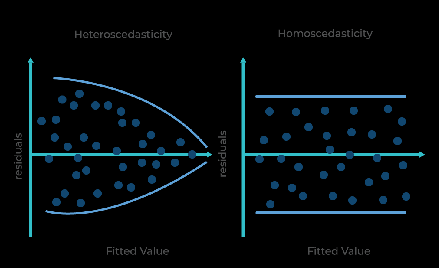

- __There shouldn't be multicollinearity.__

   Any two or more sets of input variables should not be perfectly correlated. Perfect correlation might not make the predictor's matrix full rank, which creates a problem in estimating the parameters.

  For example, while predicting the house price, you can have many input variables, _length_, _breadth_, _area_, _location_, and many more. In this case, if you include the feature, _area_  along with _length_, _breadth_, you might violate the assumptions because:

  $$\text{area} = \text{length}\times\text{breadth}$$

  In such a situation, it is better to drop one of the three input variables from the linear regression model.

- __There should be a random sampling of observations.__

  The observations for the linear regression should be randomly sampled from any population. Suppose, you are trying to build a regression model to know the factors that affect the price of the house, then you must select houses randomly from a locality, rather than adopting a convenient sampling procedure. Also, the number of observations should always be higher than the number of parameters to be estimated.